In [ ]:
#Install the dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh') 

In [ ]:
#Load the data
from google.colab import files
uploaded = files.upload()


Saving NFLX.csv to NFLX.csv


In [ ]:
#Store the data into a data frame
df = pd.read_csv('NFLX.csv')
df.head(8)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7789800
1,2022-02-07,410.170013,412.350006,393.549988,402.100006,402.100006,8232900
2,2022-02-08,398.179993,406.609985,395.829987,403.529999,403.529999,6818500
3,2022-02-09,408.649994,412.980011,398.790009,412.890015,412.890015,7738200
4,2022-02-10,402.100006,408.000000,396.359985,406.269989,406.269989,8452900
5,2022-02-11,405.329987,411.609985,387.649994,391.309998,391.309998,7558900
6,2022-02-14,387.589996,409.359985,386.890015,396.570007,396.570007,7202200
7,2022-02-15,403.790009,409.160004,401.010010,407.459991,407.459991,5392300


In [ ]:
#Get the number of trading days
df.shape

(251, 7)

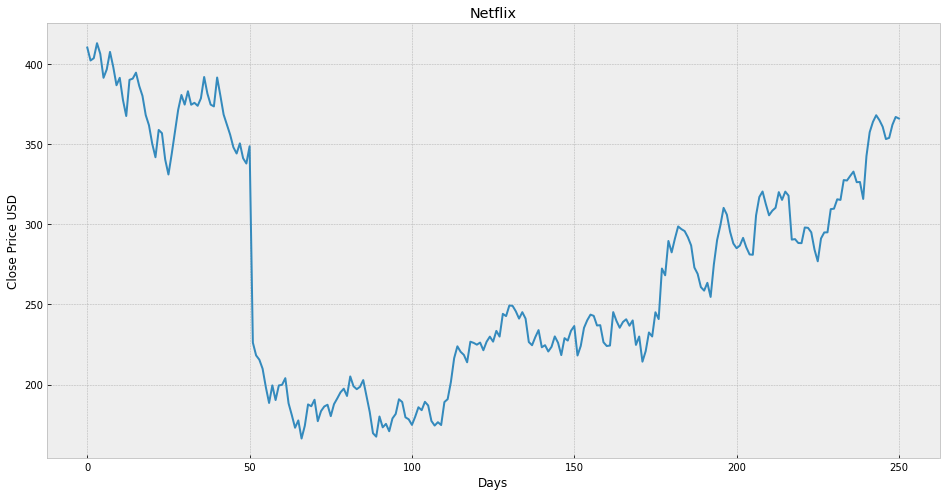

In [ ]:
#Visualize the close price data
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.show()

In [ ]:
#Get the close price
df = df[['Close']]
df.head(8)

,Close
0,410.170013
1,402.100006
2,403.529999
3,412.890015
4,406.269989
5,391.309998
6,396.570007
7,407.459991


In [ ]:
#Create a variable to predict 'x' days out into the future
future_days = 25
#Create a new column (target) shifted 'x' units/days up
df['Prediction']= df[['Close']].shift(-future_days)
df.tail(8)


<ipython-input-14-23ed2acca710>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction']= df[['Close']].shift(-future_days)


,Close,Prediction
243,367.959991,NaN
244,364.869995,NaN
245,360.769989,NaN
246,353.109985,NaN
247,353.859985,NaN
248,361.989990,NaN
249,366.890015,NaN
250,365.899994,NaN


In [ ]:
#Create the feature data set (X) and convert it to a numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[410.170013]
 [402.100006]
 [403.529999]
 [412.890015]
 [406.269989]
 [391.309998]
 [396.570007]
 [407.459991]
 [398.079987]
 [386.670013]
 [391.290009]
 [377.380005]
 [367.459991]
 [390.029999]
 [390.799988]
 [394.519989]
 [386.23999 ]
 [380.029999]
 [368.070007]
 [361.730011]
 [350.26001 ]
 [341.76001 ]
 [358.790009]
 [356.769989]
 [340.320007]
 [331.01001 ]
 [343.75    ]
 [357.529999]
 [371.399994]
 [380.600006]
 [374.589996]
 [382.920013]
 [374.48999 ]
 [375.709991]
 [373.850006]
 [378.51001 ]
 [391.820007]
 [381.470001]
 [374.589996]
 [373.470001]
 [391.5     ]
 [380.149994]
 [368.350006]
 [362.149994]
 [355.880005]
 [348.      ]
 [344.100006]
 [350.429993]
 [341.130005]
 [337.859985]
 [348.609985]
 [226.190002]
 [218.220001]
 [215.520004]
 [209.910004]
 [198.399994]
 [188.539993]
 [199.520004]
 [190.360001]
 [199.460007]
 [199.869995]
 [204.009995]
 [188.320007]
 [180.970001]
 [173.100006]
 [177.660004]
 [166.369995]
 [174.309998]
 [187.639999]
 [186.509995]
 [190.559998]
 [177.

<ipython-input-17-8ea67e721fa2>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['Prediction'], 1))[:-future_days]


In [ ]:
#Create the target data set(y) and convert it to a numpy array and get all of the target values except the last 'x' rows/days
y=np.array(df['Prediction'])[:-future_days]
print(y)

[331.01001  343.75     357.529999 371.399994 380.600006 374.589996
 382.920013 374.48999  375.709991 373.850006 378.51001  391.820007
 381.470001 374.589996 373.470001 391.5      380.149994 368.350006
 362.149994 355.880005 348.       344.100006 350.429993 341.130005
 337.859985 348.609985 226.190002 218.220001 215.520004 209.910004
 198.399994 188.539993 199.520004 190.360001 199.460007 199.869995
 204.009995 188.320007 180.970001 173.100006 177.660004 166.369995
 174.309998 187.639999 186.509995 190.559998 177.190002 183.479996
 186.350006 187.440002 180.339996 187.830002 191.399994 195.190002
 197.440002 192.910004 205.089996 198.979996 197.139999 198.610001
 202.830002 192.770004 182.940002 169.690002 167.539993 180.110001
 173.350006 175.509995 170.910004 178.889999 181.710007 190.850006
 189.139999 179.600006 178.360001 174.869995 179.949997 185.880005
 184.059998 189.270004 186.979996 177.339996 174.449997 176.559998
 174.779999 189.110001 190.919998 201.630005 216.440002 223.88

In [ ]:
#Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
#Create the models 
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [ ]:
#Get the last 'x' rows of the feature data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

<ipython-input-23-7b5d68ff4caf>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_future = df.drop(['Prediction'], 1)[:-future_days]


array([[286.690002],
       [291.5     ],
       [285.540009],
       [281.170013],
       [280.959991],
       [305.529999],
       [316.950012],
       [320.410004],
       [312.589996],
       [305.559998],
       [308.420013],
       [310.26001 ],
       [320.01001 ],
       [315.179993],
       [320.339996],
       [317.829987],
       [290.410004],
       [290.709991],
       [288.299988],
       [288.190002],
       [297.959991],
       [297.75    ],
       [294.959991],
       [284.170013],
       [276.880005]])

In [ ]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future) 
print(tree_prediction) 
print() 
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction) 

[291.119995 294.880005 294.950012 280.959991 280.959991 315.549988
 315.170013 327.540009 327.26001  330.130005 332.820007 326.220001
 342.5      315.170013 342.5      315.170013 363.829987 363.829987
 364.869995 360.769989 353.109985 353.859985 361.98999  366.890015
 365.899994]

[269.64566183 271.9951875  269.08392811 266.94932893 266.8467401
 278.84838013 284.42668052 286.1167727  282.29695624 278.86303365
 280.26005682 281.15883478 285.9213888  283.56208451 286.0825761
 284.85651933 271.46276034 271.60929411 270.43208699 270.37836245
 275.15068043 275.04810674 273.6852792  268.41473016 264.85380125]


<ipython-input-32-f4d7ced93e1e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


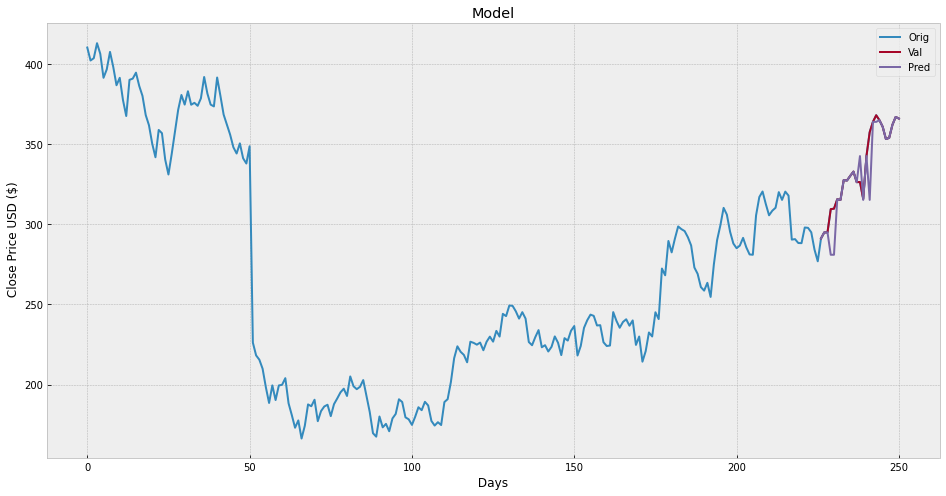

In [ ]:
#Visualize the data 
predictions = tree_prediction

valid = df[X.shape[0]:] 
valid['Predictions'] = predictions
plt.figure(figsize=(16,8)) 
plt.title('Model') 
plt.xlabel(' Days ') 
plt.ylabel(' Close Price USD ($)') 
plt.plot(df['Close'])  
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig' , 'Val' , 'Pred']) 
plt.show()    

<ipython-input-33-e3f21c5b9d90>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


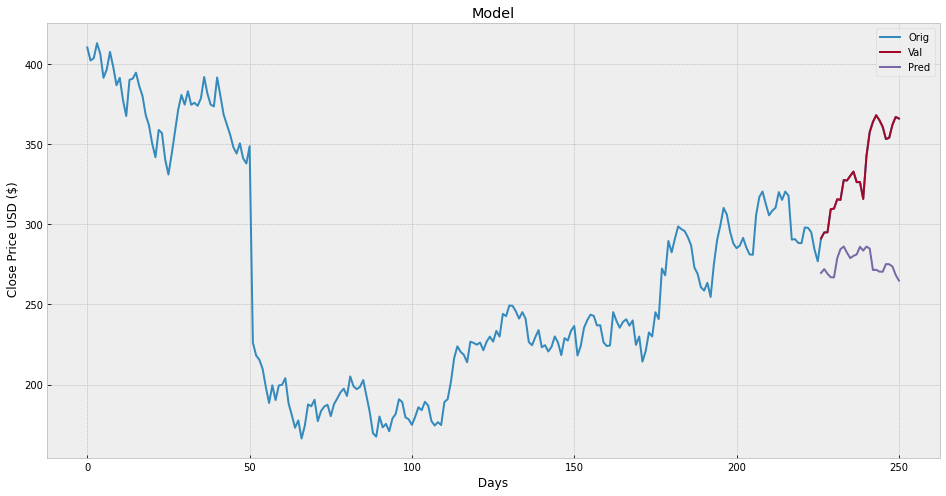

In [ ]:
#Visualize the data 
predictions = lr_prediction

valid = df[X.shape[0]:] 
valid['Predictions'] = predictions
plt.figure(figsize=(16,8)) 
plt.title('Model') 
plt.xlabel(' Days ') 
plt.ylabel(' Close Price USD ($)') 
plt.plot(df['Close'])  
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig' , 'Val' , 'Pred']) 
plt.show()    